In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("IID Results/New Results/Final_IID_Backdoor_Attack_Results.csv")
df

,Attacker %,Static ASR,Static BA,Static Clean Acc,Location Inv ASR,Location Inv BA,Location Inv Clean Acc,Size Inv ASR,Size Inv BA,Size Inv Clean Acc,Pattern Inv ASR,Pattern Inv BA,Pattern Inv Clean Acc,Random Across All ASR,Random Across All BA,Random Across All Clean Acc
0,0,11.22,52.80,54.58,11.22,52.80,54.58,11.22,52.80,54.58,11.22,52.80,54.58,11.22,52.80,54.58
1,10,72.69,25.75,54.22,17.37,53.56,54.72,63.08,31.40,54.07,69.27,28.03,55.75,21.55,48.62,52.89
2,20,89.67,15.73,53.59,20.26,52.75,53.67,82.73,20.29,54.65,85.45,18.43,53.82,26.19,46.58,52.72
3,30,94.84,12.90,51.95,31.97,47.20,48.54,89.98,15.59,52.29,92.43,14.45,54.00,35.32,43.70,51.60
4,40,95.84,12.40,53.22,27.39,48.93,50.49,94.44,13.47,54.07,94.61,12.99,52.13,48.47,38.09,51.29
5,50,96.66,11.92,52.85,46.18,41.20,43.37,97.54,11.46,52.22,96.15,12.27,52.80,51.53,36.89,50.06


In [39]:
configurations = [
    {"label": "Static case", "location": "fixed", "pattern_type": "plus"},
    {"label": "Location Invariant", "location": "random", "pattern_type": "plus"},
    {"label": "Size Invariant", "location": "fixed", "pattern_type": "plus", "pattern_size": "random"},
    {"label": "Pattern Invariant", "location": "fixed", "pattern_type": "random"},
    {"label": "Random Across All", "location": "random", "pattern_type": "random", "pattern_size": "random"}
]

In [40]:
results_asr = {config["label"]: [] for config in configurations}
results_bd_acc = {config["label"]: [] for config in configurations}
results_clean_acc = {config["label"]: [] for config in configurations}

In [41]:
for i in df["Static ASR"]:
    results_asr["Static case"].append(i)
for i in df["Static BA"]:
    results_bd_acc["Static case"].append(i)
for i in df["Static Clean Acc"]:
    results_clean_acc["Static case"].append(i)
    
for i in df["Location Inv ASR"]:
    results_asr["Location Invariant"].append(i)
for i in df["Location Inv BA"]:
    results_bd_acc["Location Invariant"].append(i)
for i in df["Location Inv Clean Acc"]:
    results_clean_acc["Location Invariant"].append(i)
    
for i in df["Size Inv ASR"]:
    results_asr["Size Invariant"].append(i)
for i in df["Size Inv BA"]:
    results_bd_acc["Size Invariant"].append(i)
for i in df["Size Inv Clean Acc"]:
    results_clean_acc["Size Invariant"].append(i)
    
for i in df["Pattern Inv ASR"]:
    results_asr["Pattern Invariant"].append(i)
for i in df["Pattern Inv BA"]:
    results_bd_acc["Pattern Invariant"].append(i)
for i in df["Pattern Inv Clean Acc"]:
    results_clean_acc["Pattern Invariant"].append(i)    
    
for i in df["Random Across All ASR"]:
    results_asr["Random Across All"].append(i)
for i in df["Random Across All BA"]:
    results_bd_acc["Random Across All"].append(i)
for i in df["Random Across All Clean Acc"]:
    results_clean_acc["Random Across All"].append(i)   

In [42]:
x_axis_attacker = [0, 10, 20, 30, 40, 50]

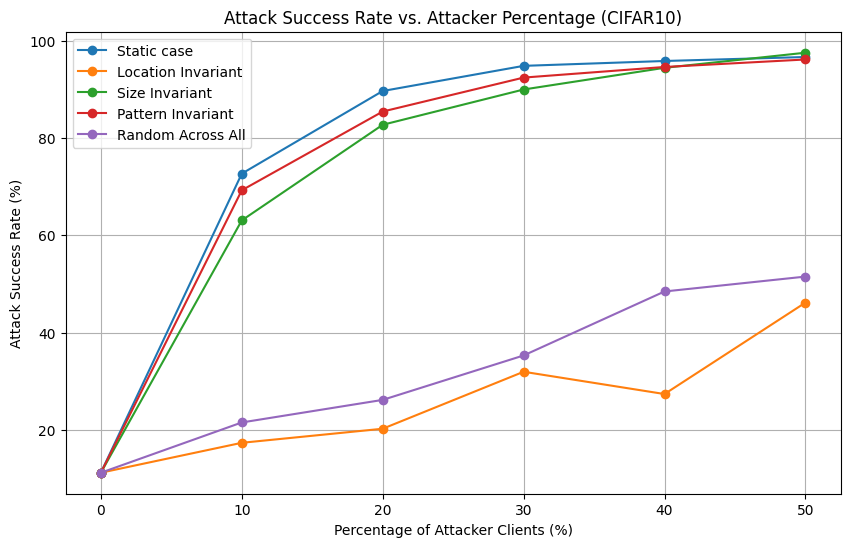

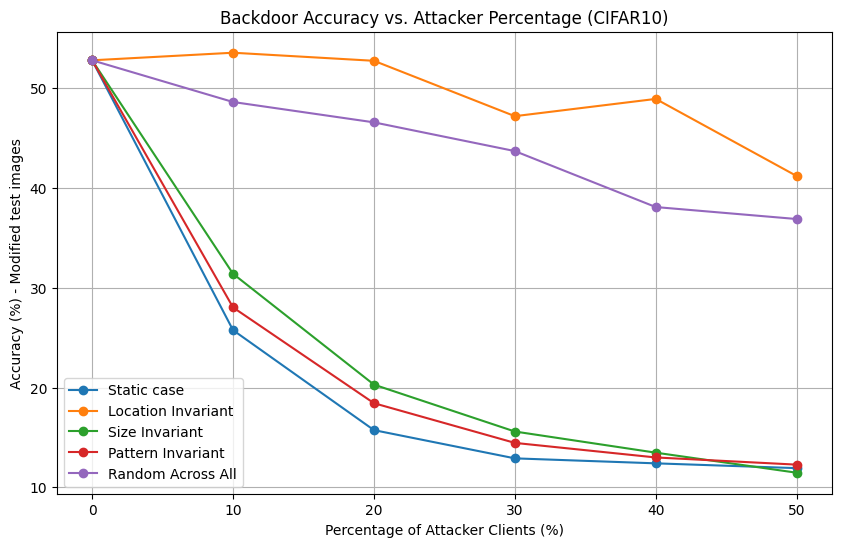

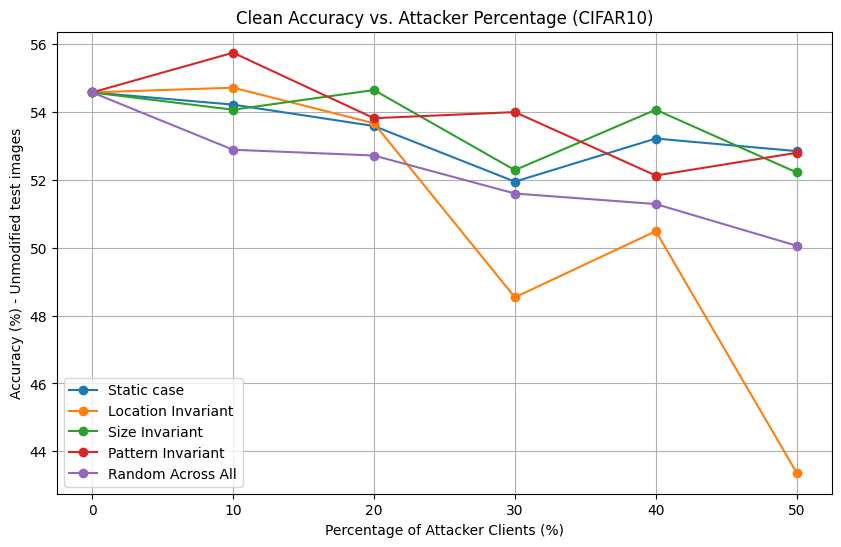

In [43]:
plt.figure(figsize=(10, 6))
for label, rates in results_asr.items():
    plt.plot(x_axis_attacker, rates, marker='o', label=label)
plt.xlabel("Percentage of Attacker Clients (%)")
plt.ylabel("Attack Success Rate (%)")
plt.title("Attack Success Rate vs. Attacker Percentage (CIFAR10)")
plt.legend()
plt.grid(True)
plt.savefig("backdoor_attack_success_vs_attacker_percentage.png")

# ----- Backdoor Accuracy vs. Attacker Percentage -----
plt.figure(figsize=(10, 6))
for label, bd_acc_rates in results_bd_acc.items():
    plt.plot(x_axis_attacker, bd_acc_rates, marker='o', label=label)
plt.xlabel("Percentage of Attacker Clients (%)")
plt.ylabel("Accuracy (%) - Modified test images")
plt.title("Backdoor Accuracy vs. Attacker Percentage (CIFAR10)")
plt.legend()
plt.grid(True)
plt.savefig("backdoor_accuracy_vs_attacker_percentage.png")

# ----- Clean Accuracy vs. Attacker Percentage -----
plt.figure(figsize=(10, 6))
for label, clean_acc_rates in results_clean_acc.items():
    plt.plot(x_axis_attacker, clean_acc_rates, marker='o', label=label)
plt.xlabel("Percentage of Attacker Clients (%)")
plt.ylabel("Accuracy (%) - Unmodified test images")
plt.title("Clean Accuracy vs. Attacker Percentage (CIFAR10)")
plt.legend()
plt.grid(True)
plt.savefig("clean_accuracy_vs_attacker_percentage.png")
